In [9]:
import pandas as pd
import numpy as np


In [10]:
dataset=pd.read_excel("test.xlsx")
df=pd.DataFrame(dataset)

In [11]:
df.drop(index=102,inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(89, 19)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 98
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cinsiyet ?      89 non-null     float64
 1   bölüm           89 non-null     object 
 2   lisans dr.      89 non-null     object 
 3   Üni. Yıl        89 non-null     float64
 4   Öğretim         89 non-null     object 
 5   h_içi çaışma    89 non-null     float64
 6   h_sonu çaışma   89 non-null     object 
 7   not çıkarma     89 non-null     float64
 8   uygulama        89 non-null     float64
 9   tekrar          89 non-null     float64
 10  çıkmış sorular  89 non-null     float64
 11  renklendirmek   89 non-null     float64
 12  Alttan ders     89 non-null     object 
 13  not tutma       89 non-null     object 
 14  uyku            89 non-null     object 
 15  devam oranı     89 non-null     float64
 16  verim           89 non-null     object 
 17  çalışma tarzı   89 non-null     objec

In [15]:
X=df.iloc[:,:18].values
y=df.iloc[:,18].values

In [16]:
from sklearn.model_selection import train_test_split as parcala

In [17]:
X_train,X_test,y_train,y_test = parcala(X,y,test_size=0.25,random_state=0)

In [18]:
y_train=y_train.astype(int)   
y_test=y_test.astype(int)

X_train=X_train.astype(int)   
X_test=X_test.astype(int)

# Standardize etme  (x-mu)/sigma
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [360]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


[Text(200.88000000000002, 181.2, 'X[12] <= 1.269\ngini = 0.351\nsamples = 66\nvalue = [15, 51]'),
 Text(133.92000000000002, 108.72, 'X[5] <= -1.418\ngini = 0.188\nsamples = 57\nvalue = [6, 51]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.135\nsamples = 55\nvalue = [4, 51]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

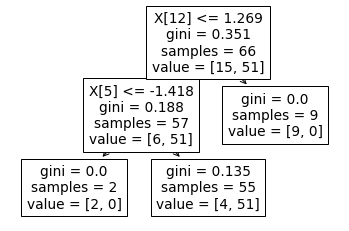

In [378]:
kararAgacı = DecisionTreeClassifier()
kararAgacı = DecisionTreeClassifier(min_impurity_decrease=0.05)
# kararAgacı = DecisionTreeClassifier(max_depth=3)
kararAgacı = kararAgacı.fit(X_train,y_train)
tree.plot_tree(kararAgacı)

In [379]:
kurallar= tree.export_text(kararAgacı)
print(kurallar)


|--- feature_12 <= 1.27
|   |--- feature_5 <= -1.42
|   |   |--- class: 0
|   |--- feature_5 >  -1.42
|   |   |--- class: 1
|--- feature_12 >  1.27
|   |--- class: 0



In [380]:
# Tahmin
y_pred = kararAgacı.predict(X_test)
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0]


In [381]:
# confision matris
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("\nConfusion matris\n",cm) # 1 kere gozlemliyor


Confusion matris
 [[ 6  1]
 [ 0 16]]


In [375]:
from sklearn.model_selection import cross_val_score

In [376]:
basari = cross_val_score(estimator = kararAgacı, X=X_test, y=y_test , cv = 4)# katman sayısı kadar terarlanıp ort almıs


print(basari.mean()) 
print(basari.std())

0.825
0.11873172373979174


In [377]:
print(y_pred)
print(y_test)

[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0]


In [382]:
print("\nOrtalama basarı oranı : ",basari.mean())
print("\nstandart sapma : ",basari.std())



Ortalama basarı oranı :  0.825

standart sapma :  0.11873172373979174
